# Analyzing and Visualizing Sentiment Patterns in Social Media Data

# Step 1: Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Narthana\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Step 2: Load and Clean the Data

In [2]:
# Load the dataset
data = pd.read_csv("C:\\Users\\Narthana\\Downloads\\twitter_validation.csv")

# Remove rows with missing values
data.dropna(subset=['TWEETCONTENT'], inplace=True)

# Remove irrelevant rows
data = data[data['SENTIMENT'] != 'Irrelevant']

# Convert SENTIMENT column to lowercase for consistency
data['SENTIMENT'] = data['SENTIMENT'].str.lower()


# Step 3: Exploratory Data Analysis (EDA)

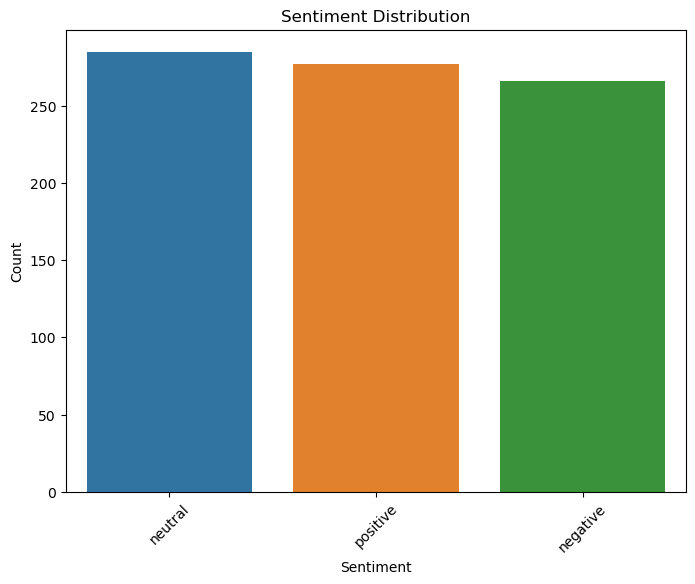

In [3]:
# Count the number of tweets per sentiment
sentiment_counts = data['SENTIMENT'].value_counts()

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Step 4: Sentiment Analysis

Perform sentiment analysis using the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool:

In [4]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each tweet
data['SENTIMENT_SCORE'] = data['TWEETCONTENT'].apply(lambda x: analyzer.polarity_scores(x)['compound'])


# Step 5: Visualize Sentiment Scores

Visualize the distribution of sentiment scores:

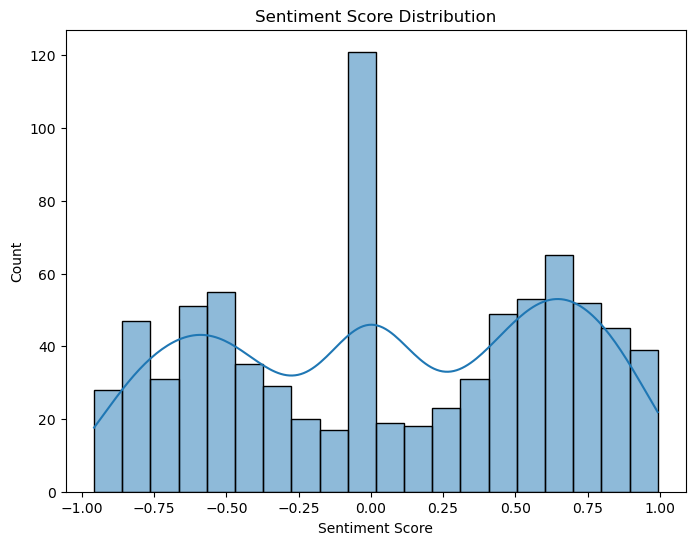

In [5]:
plt.figure(figsize=(8, 6))
sns.histplot(data['SENTIMENT_SCORE'], bins=20, kde=True)
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()


# Step 6: Sentiment Analysis Results

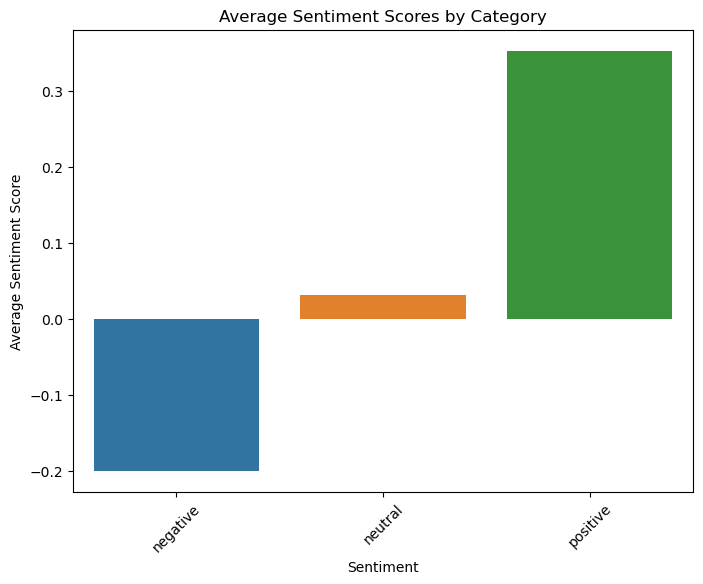

In [6]:
# Calculate the average sentiment score per sentiment category
sentiment_avg_scores = data.groupby('SENTIMENT')['SENTIMENT_SCORE'].mean().sort_values()

# Plot average sentiment scores
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_avg_scores.index, y=sentiment_avg_scores.values)
plt.title('Average Sentiment Scores by Category')
plt.xlabel('Sentiment')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.show()


# Step 7: Interpretation and Inference

Inference from the analysis:

The "Sentiment Distribution" plot shows the distribution of sentiment categories in the dataset.

The "Sentiment Score Distribution" plot visualizes the distribution of sentiment scores, with a higher score indicating a more positive sentiment.

The "Average Sentiment Scores by Category" plot displays the average sentiment scores for each sentiment category.

# Step 8: Analyzing Entity-wise Sentiment

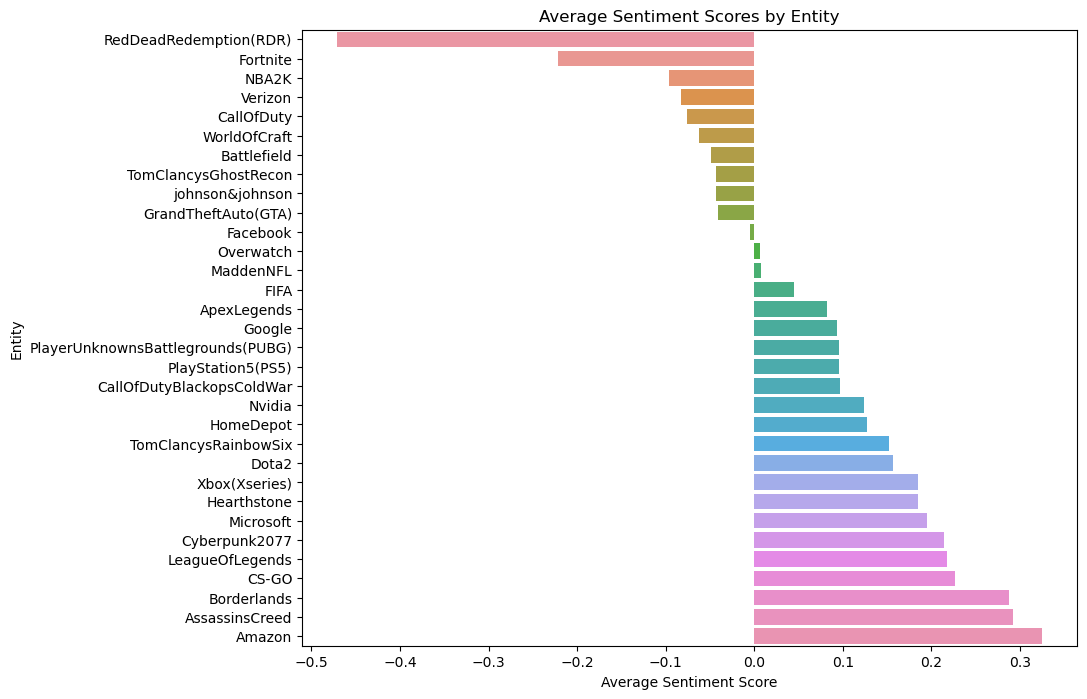

In [7]:
# Calculate average sentiment score for each entity
entity_avg_scores = data.groupby('ENTITY')['SENTIMENT_SCORE'].mean().sort_values()

# Plot average sentiment scores by entity
plt.figure(figsize=(10, 8))
sns.barplot(y=entity_avg_scores.index, x=entity_avg_scores.values)
plt.title('Average Sentiment Scores by Entity')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Entity')
plt.show()


This step will help you understand which entities (brands, topics, etc.) are associated with higher or lower sentiment scores.

# Step 9: Word Cloud for Positive and Negative Sentiments

In [9]:
pip install wordcloud


     -------------------------------------- 152.1/152.1 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


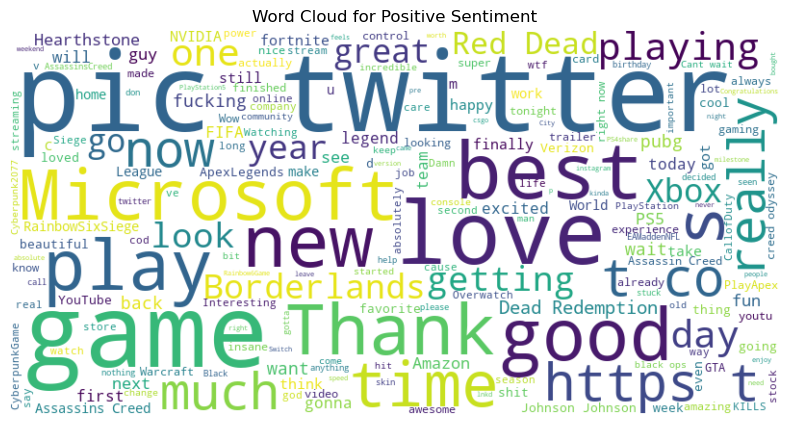

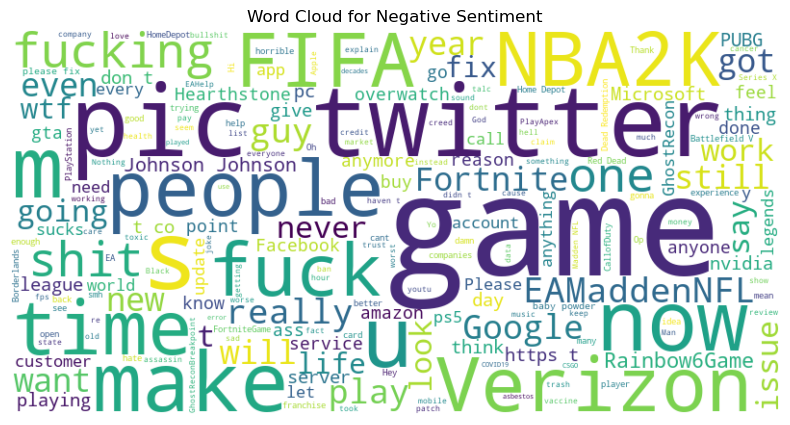

In [10]:
from wordcloud import WordCloud

# Generate word cloud for positive sentiment
positive_tweets = data[data['SENTIMENT'] == 'positive']['TWEETCONTENT']
positive_text = ' '.join(positive_tweets)
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Generate word cloud for negative sentiment
negative_tweets = data[data['SENTIMENT'] == 'negative']['TWEETCONTENT']
negative_text = ' '.join(negative_tweets)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot positive sentiment word cloud
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment')
plt.show()

# Plot negative sentiment word cloud
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiment')
plt.show()


These word clouds visually represent the most frequently occurring words in positive and negative sentiment tweets.

# Step 10: Top Positive and Negative Tweets

In [11]:
# Get top positive tweets
top_positive_tweets = data[data['SENTIMENT'] == 'positive'].nlargest(5, 'SENTIMENT_SCORE')['TWEETCONTENT']

# Get top negative tweets
top_negative_tweets = data[data['SENTIMENT'] == 'negative'].nsmallest(5, 'SENTIMENT_SCORE')['TWEETCONTENT']

# Print top positive tweets
print("Top Positive Tweets:")
for tweet in top_positive_tweets:
    print("-", tweet)

# Print top negative tweets
print("\nTop Negative Tweets:")
for tweet in top_negative_tweets:
    print("-", tweet)


Top Positive Tweets:
- I FINALLY finished Borderlands 3! It's taken a while, but I'm so proud of myself. :D Now onto the Guns, Love, and Tentacles DLC, I'm so excited! I love Wainwright and Hammerlock so much and they make a great couple, so seeing them get married will be awesome!
- Hey guys, I just hit legend on EU with an incredible winrate of 45%, which seems strange to me, but I take it :D Got a lot of rewards and the new ranks look kinda cool, so overall pretty happy with the changes till now. #Hearthstone pic.twitter.com/X7NqItOKlO
- Watching NVIDIA position itself as not just a leading hardware manufacturer but also providing meaningful software to consumers is a remarkable thing of beauty. What an incredibly lead company with clear focus and goals. Well done @nvidia.
- Yuumi - super cool fucking cat
Braum - such a good person
Neeko - damn funny
Janna - she would take good care
- Trust in Technology is Important !
@satyanadella at #MSInspire 
I Love the Boomerang in the Backgro

These word clouds visually represent the most frequently occurring words in positive and negative sentiment tweets.

# Step 11: Summary and Conclusion

Based on the analysis and visualizations, you can draw conclusions about the public opinion and attitudes towards specific topics or brands. For example, you can identify which entities are associated with higher sentiment scores, analyze common words in positive and negative sentiments, and understand the overall sentiment trends in the social media data.